In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from toy_samples import gaussian_samples, wedding_cake_samples, correlated_gaussian_samples
from lm_full import log_uniform_guesses, global_live_lm, local_live_lm, estimate_iterations, live_data
from lm_full import levenberg_marquardt, logL_model
from plotting import plot_statistics_sample

Set of NS chains for making predictions. Import model, run model on chain and plot estimates for d and sigma.

Tests with increasing complexity; run algorithm one by one seeing how the results are\
samples_1 has nlive = 500, ndims = 10, sigma = 0.1\
samples_low_var has nlive = 500, ndims = 10, sigma = 0.001\
samples_high_dim has nlive = 500, ndims = 25, sigma = 0.01\
\
Check accuracy vs repeats used for global live minimum

In [2]:
def pickle_dump(filename, data):
    """Function that pickles data into a file"""
    import pickle
    pickle_out = open(filename, "wb")
    pickle.dump(data, pickle_out)
    pickle_out.close()

def pickle_in(filename):
    import pickle
    pickle_in = open(filename, "rb")
    data = pickle.load(pickle_in)
    return data

In [3]:
samples_g_1, samples_c_1, samples_w_1 = pickle_in("test_samples/samples_1.pickle")
samples_g_2, samples_c_2, samples_w_2 = pickle_in("test_samples/samples_low_var.pickle")

5496


/home/zixiao/Documents/III/aeons/venv/lib/python3.10/site-packages/anesthetic-2.0.0b12-py3.10.egg/anesthetic/labelled_pandas.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


0 [0.5, 1.0, 1e-05] [2.86405761e+03 1.04751612e+01 6.64313695e-04] 151846571.1749834
1 [0.5, 1.144533733710742, 1.623776739188722e-05] [2.86406990e+03 1.04751619e+01 6.64313713e-04] 151846571.17492935
2 [0.5, 1.3099574676018515, 2.636650898730358e-05] [2.86404549e+03 1.04751605e+01 6.64313680e-04] 151846571.17509404
3 [0.5, 1.4992905113966155, 4.281332398719393e-05] [2.86408279e+03 1.04751626e+01 6.64313730e-04] 151846571.17496517
4 [0.5, 1.715988566925856, 6.951927961775604e-05] [2.86405779e+03 1.04751612e+01 6.64313696e-04] 151846571.17497435
5 [0.5, 1.9640068015085954, 0.00011288378916846888] [2.86407997e+03 1.04751624e+01 6.64313726e-04] 151846571.17495003
6 [0.5, 2.247872037563925, 0.00018329807108324352] [2.86408098e+03 1.04751625e+01 6.64313727e-04] 151846571.17495444
7 [0.5, 2.572765376057012, 0.00029763514416313166] [2.86405592e+03 1.04751611e+01 6.64313694e-04] 151846571.17498636
8 [0.5, 2.944616761820253, 0.000483293023857175] [2.86405382e+03 1.04751610e+01 6.64313691e-04] 1

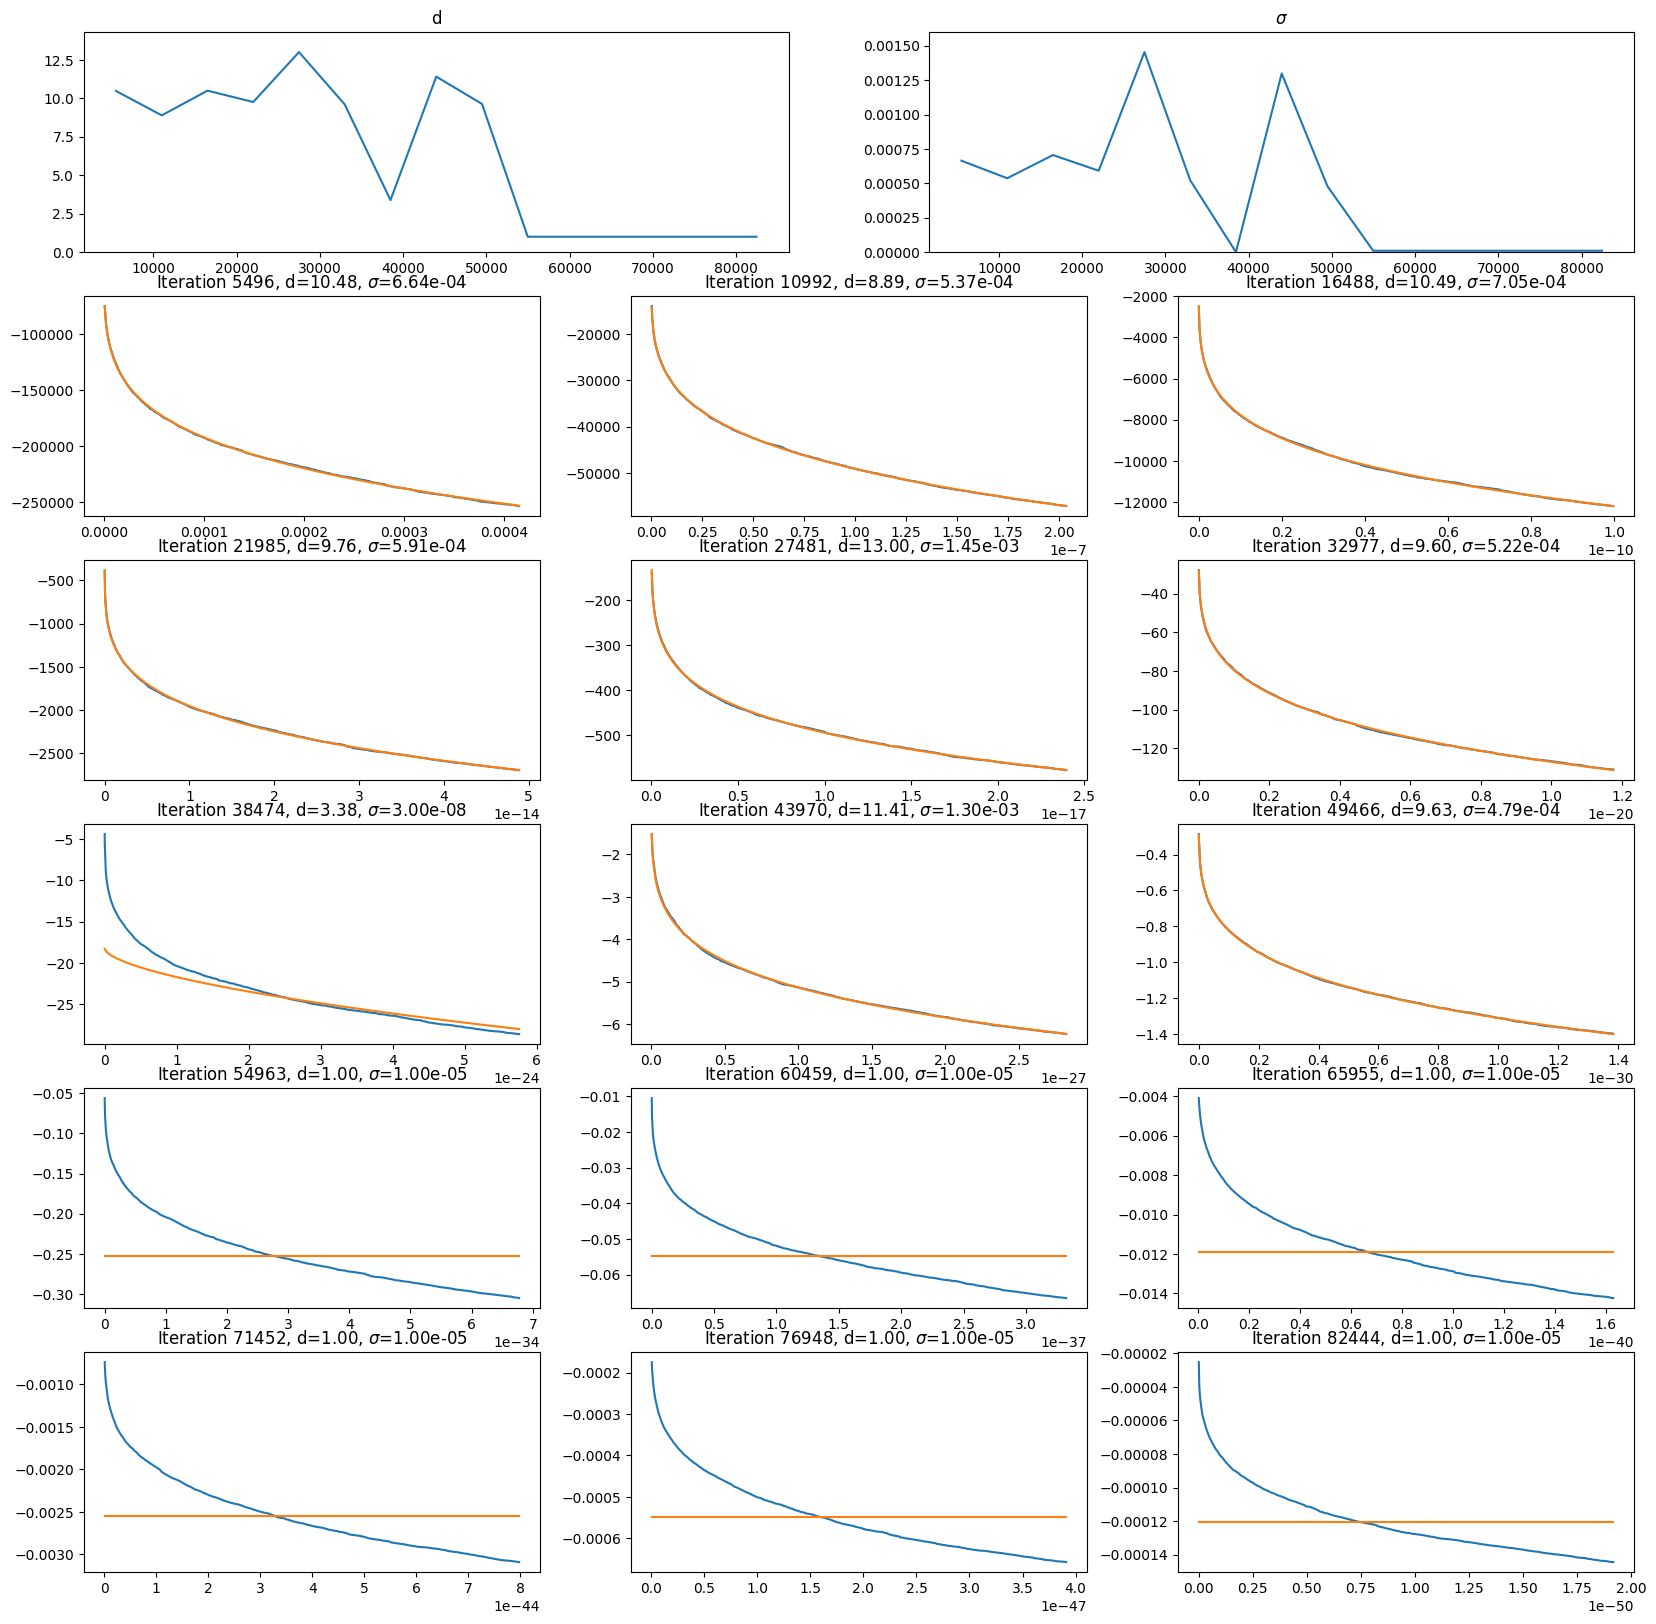

In [4]:
plot_statistics_sample(samples_c_2, global_live_lm, 15, (log_uniform_guesses, 20))